# MoodEmoji
**An emotion classification model that detects the emotion of a person and displays relevant emoji**

**Importing necessary libraries**

In [7]:
!pip install git+https://github.com/keras-team/keras-preprocessing.git
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Input, Flatten
from keras_preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import cv2 as cv
import os

  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-gqlu1_yd
  Running command git clone --filter=blob:none --quiet https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-gqlu1_yd
  Resolved https://github.com/keras-team/keras-preprocessing.git to commit 3e380065d4afc7347aaee8d89325a16b22158438
  Preparing metadata (setup.py) ... done


In [8]:
SIZE = 48

In [9]:
angry_path = '/kaggle/input/emotion-detection-fer/train/angry'
# disgusted_path = '/kaggle/input/emotion-detection-fer/train/disgusted'
fearful_path = '/kaggle/input/emotion-detection-fer/train/fearful'
happy_path = '/kaggle/input/emotion-detection-fer/train/happy'
neutral_path = '/kaggle/input/emotion-detection-fer/train/neutral'
sad_path = '/kaggle/input/emotion-detection-fer/train/sad'
surprised_path = '/kaggle/input/emotion-detection-fer/train/surprised'

**Loading images**

In [10]:
def load_images(folder_path, label):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(folder_path):
#         if count==3000:
#             break
#         print(count)
        img_path = os.path.join(folder_path, filename)
        image = cv.imread(img_path,1)
#         print(image.shape)
        if image is None:
          continue
        image = cv.resize(image, (SIZE, SIZE))
        images.append(image)
        labels.append(label)
        count+=1
    return images, labels

In [11]:
angry_images, angry_labels = load_images(angry_path, 0)
fearful_images, fearful_labels = load_images(fearful_path, 1)
happy_images, happy_labels = load_images(happy_path, 2)
neutral_images, neutral_labels = load_images(neutral_path, 3)
sad_images, sad_labels = load_images(sad_path, 4)
surprised_images, surprised_labels = load_images(surprised_path, 5)

In [12]:
print(len(angry_images))
print(len(sad_labels))
print(len(angry_labels))

3995
4830
3995


In [13]:
images = np.concatenate([angry_images, fearful_images, happy_images, neutral_images, sad_images, surprised_images])
labels = np.concatenate([angry_labels, fearful_labels, happy_labels, neutral_labels, sad_labels, surprised_labels])

In [14]:
print(images.shape)
print(labels.shape)

(28273, 48, 48, 3)
(28273,)


In [15]:
angry_path = '/kaggle/input/emotion-detection-fer/test/angry'
# disgusted_path = '/kaggle/input/emotion-detection-fer/train/disgusted'
fearful_path = '/kaggle/input/emotion-detection-fer/test/fearful'
happy_path = '/kaggle/input/emotion-detection-fer/test/happy'
neutral_path = '/kaggle/input/emotion-detection-fer/test/neutral'
sad_path = '/kaggle/input/emotion-detection-fer/test/sad'
surprised_path = '/kaggle/input/emotion-detection-fer/test/surprised'

In [16]:
angry_images, angry_labels = load_images(angry_path, 0)
fearful_images, fearful_labels = load_images(fearful_path, 1)
happy_images, happy_labels = load_images(happy_path, 2)
neutral_images, neutral_labels = load_images(neutral_path, 3)
sad_images, sad_labels = load_images(sad_path, 4)
surprised_images, surprised_labels = load_images(surprised_path, 5)

In [17]:
print(len(angry_images))
print(len(sad_labels))
print(len(angry_labels))

958
1247
958


In [18]:
images = np.concatenate([images, angry_images, fearful_images, happy_images, neutral_images, sad_images, surprised_images])
labels = np.concatenate([labels, angry_labels, fearful_labels, happy_labels, neutral_labels, sad_labels, surprised_labels])

In [19]:
print(images.shape)
print(labels.shape)

(35340, 48, 48, 3)
(35340,)


In [20]:
labels = to_categorical(labels, 6)

In [21]:
print(labels.shape)

(35340, 6)


**Splitting training and test set**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.01, random_state=42)
print(len(X_train))
print(len(X_test))

34986
354


In [23]:
X_test1 = X_test
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

**Model definition**

In [24]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 256)        0

In [26]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**Model Training**

In [27]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
547/547 [==============================] - 16s 11ms/step - loss: 1.7638 - accuracy: 0.2512
Epoch 2/50
547/547 [==============================] - 7s 12ms/step - loss: 1.6961 - accuracy: 0.2873
Epoch 3/50
547/547 [==============================] - 6s 10ms/step - loss: 1.5599 - accuracy: 0.3604
Epoch 4/50
547/547 [==============================] - 5s 10ms/step - loss: 1.4209 - accuracy: 0.4160
Epoch 5/50
547/547 [==============================] - 6s 10ms/step - loss: 1.3845 - accuracy: 0.4565
Epoch 6/50
547/547 [==============================] - 5s 10ms/step - loss: 1.3237 - accuracy: 0.4725
Epoch 7/50
547/547 [==============================] - 6s 11ms/step - loss: 1.2548 - accuracy: 0.5023
Epoch 8/50
547/547 [==============================] - 5s 10ms/step - loss: 1.2050 - accuracy: 0.5263
Epoch 9/50
547/547 [==============================] - 5s 10ms/step - loss: 1.1623 - accuracy: 0.5436
Epoch 10/50
547/547 [==============================] - 5s 10ms/step - loss: 1.1228 - accur

**Model evaluation**

In [28]:
prediction_on_test_data = model.evaluate(X_test, y_test)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1))

12/12 [==============================] - 0s 10ms/step - loss: 3.2150 - accuracy: 0.5932
Loss:  3.2149667739868164
Accuracy:  59.3


In [29]:
def plot_images(image,labels,predicted):
    plt.figure(figsize=(2,2))
    plt.subplot(1,1,1)
    print(emojis[predicted])
    print(emojis[np.argmax(labels)])
#     plt.title(emoji[predicted], color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.show()

**Images against their predicted emoji and actual emoji**

1/1 [==============================] - 0s 20ms/step
😊
😊


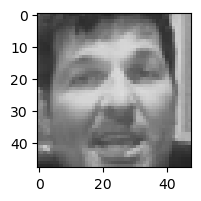

1/1 [==============================] - 0s 23ms/step
😊
😔


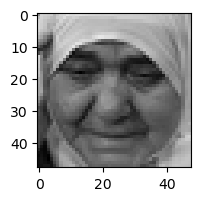

1/1 [==============================] - 0s 19ms/step
😊
😊


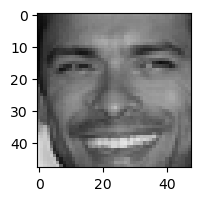

1/1 [==============================] - 0s 19ms/step
😊
😊


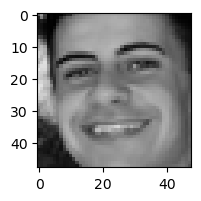

1/1 [==============================] - 0s 19ms/step
😊
😊


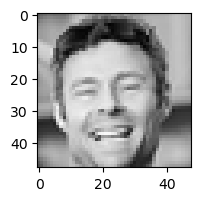

In [35]:
emojis = ["👿", "😱" , "😊" , "😐 ", "😔" , "😲" ]
for i in range(80,85,1):
#     new_image_resized = resize(np.array(X_test[i]), (64, 64, 3))
#     print(X_test[i].shape)
    image = cv.resize(X_test1[i], (SIZE, SIZE))
#     print(image.shape)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    image1 = X_test[i]
    image1 = np.expand_dims(image1, axis=0)
#     image = np.resize(np.array(X_test[i]), (64, 64, 3))
    prediction = np.argmax(model.predict(image1))

    plot_images(X_test1[i], y_test[i], prediction);